In [124]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts
#from pandas_ml import ConfusionMatrix as CM
from sklearn.metrics import confusion_matrix as CM
import matplotlib as plt

In [96]:
os.chdir("E:\data scientist\kaggle dataset")

In [116]:
#uploading dataset and converting to array
train_data=pd.read_csv("train.csv")#.values.astype('int32')
test_data=pd.read_csv("test.csv")#.values.astype("int32")

In [117]:
y_train = train_data["label"]  # store target value coresponding to pixels present

x_train = train_data.drop(labels = ["label"] , axis = 1)


In [53]:
# Some Pre-Processing 
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

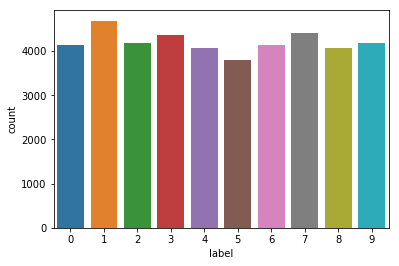

In [62]:
import seaborn as sns

sns.countplot(y_train)
#(y_train.value_counts())

In [70]:
#check is there any missing value present

x_train.isnull().sum()
x_train.isnull().any().describe()

test_data.isnull().sum()
test_data.isnull().any().describe()  #no missing value present

count       784
unique        1
top       False
freq        784
dtype: object

In [153]:
# Normalize/Scaling  the data which is range (0-1)--- to do that use normalize function which is in tensorflow keras
# another way to normalize the data is simple divive by 255


x_train = tf.keras.utils.normalize(x_train, axis=1)
test_data = tf.keras.utils.normalize(test_data, axis = 1)

In [154]:
#Reshape image 
x_train = x_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

#y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [120]:
# split data in training and evaluate sets
# Lets choose to split the train set in two parts 
# A small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.


x_train_data, x_eval, y_train_data, y_eval = tts(x_train, y_train, test_size = 0.2, random_state=2)

In [121]:
y_train_data

21250    2
20334    3
29647    2
3220     9
5293     0
18876    7
19344    3
1268     1
25937    8
25624    5
23405    7
25031    1
26378    8
26250    7
37335    4
13154    8
17153    2
26110    4
25707    7
14624    7
20098    9
13982    0
23526    3
2854     0
37586    9
14357    2
1700     4
2077     0
39586    5
24823    7
        ..
12420    3
19694    8
36432    4
16415    8
27859    1
40390    4
25902    0
16639    2
21372    2
20026    6
15905    9
8170     9
29547    1
21418    9
20084    1
41084    2
6548     1
32031    5
11071    9
5167     1
35541    8
33201    9
14696    4
33867    2
18898    0
31019    7
30280    9
6637     2
35343    9
23720    4
Name: label, Length: 33600, dtype: int64

In [122]:
# Defining the model
# with the help of keras sequential we built a model, in this we add one layer at a time starting with flatten input

model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten()) # just reshaping the pixel as single line input

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation =tf.nn.relu, input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation =tf.nn.relu))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation =tf.nn.relu))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation =tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu)) # 128 is no of neurons present in this layer
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))  # output layer

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_data, y_train_data, epochs=2)





Epoch 1/2
33600/33600 [==============================] - 1237s 37ms/step - loss: 0.2362 - acc: 0.9232
Epoch 2/2
33600/33600 [==============================] - 1234s 37ms/step - loss: 0.0694 - acc: 0.9785


In [141]:
#Evaluating the model i.e how accurate our model works

val_los, val_acc = model.evaluate(x_eval, y_eval)
print(val_los, val_acc) # loss = .055 &  Accuracy = .98



8400/8400 [==============================] - 21s 2ms/step
0.0551207129247 0.983214285714


In [152]:
#Saving the model
model.save("digit_recognize.model")
#loading the model to predict
model_load = tf.keras.models.load_model("digit_recognize.model")

In [160]:
# make prediction of test data
predictions = model_load.predict([test_data])

In [162]:
arg_values= np.argmax(predictions, axis = 1)
arg_values

array([2, 0, 9, ..., 3, 4, 2], dtype=int64)

In [163]:
arg_values = pd.Series(arg_values,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),arg_values],axis = 1)


In [164]:
submission.to_csv("submission_file.csv",index=False)